# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
city = cities[0]
url = "http://api.openweathermap.org/geo/1.0/direct?q=" + city + "&appid=" + weather_api_key
response = requests.get(url)
print(response.status_code)

200


In [13]:
# These next few cells are just to test out how the API works and what the loaded data means.

data = response.json()
lat = data[0]['lat']
lon = data[0]['lon']
city

'rikitea'

In [14]:
data

[{'name': 'Rikitea',
  'local_names': {'fr': 'Rikitea', 'ru': 'Рикитеа'},
  'lat': -23.1229544,
  'lon': -134.9680141,
  'country': 'FR',
  'state': 'French Polynesia'}]

In [15]:
url2 = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&units=imperial'
response2 = requests.get(url2)
print(response.status_code)

200


In [16]:
data2 = response2.json()
data2

{'coord': {'lon': -134.968, 'lat': -23.123},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 70.21,
  'feels_like': 70.18,
  'temp_min': 70.21,
  'temp_max': 70.21,
  'pressure': 1020,
  'humidity': 69,
  'sea_level': 1020,
  'grnd_level': 1016},
 'visibility': 10000,
 'wind': {'speed': 14.14, 'deg': 121, 'gust': 14.07},
 'clouds': {'all': 100},
 'dt': 1667579241,
 'sys': {'country': 'PF', 'sunrise': 1667571150, 'sunset': 1667618060},
 'timezone': -32400,
 'id': 4030556,
 'name': 'Rikitea',
 'cod': 200}

In [17]:
data2.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [73]:
# Main cell to create cities DataFrame by using the API

a = 1
b = 0
cnames = []
clats = []
clons = []
cmaxtemps = []
chumids = []
cclouds = []
cspeeds = []
ccountries = []
cdates = []
rows = [cnames, clats, clons, cmaxtemps, chumids, cclouds, cspeeds, ccountries, cdates]

print("Beginning Data Retrieval")
print("---------------------------------")

for city in cities:
    url = "http://api.openweathermap.org/geo/1.0/direct?q=" + city + "&appid=" + weather_api_key
    response = requests.get(url)
    data = response.json()
    
    if ((response.status_code == 200) & (data != [])):
        lat = data[0]['lat']
        lon = data[0]['lon']
        url2 = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&units=imperial'
        response2 = requests.get(url2)
        data2 = response2.json()
        
        if ((response2.status_code == 200) & (data2 != [])):
            
            if (('name' in data2.keys()) & (data2['name'] != '')):
                rows[0].append(data2['name']) 
            else:
                rows[0].append(None)
                #print('hello')
                
            if (('coord' in data2.keys()) & ('lat' in data2['coord'].keys())):
                rows[1].append(data2['coord']['lat']) 
            else:
                rows[1].append(np.nan)
                #print('hello1')
                
            if (('coord' in data2.keys()) & ('lon' in data2['coord'].keys())):
                rows[2].append(data2['coord']['lon']) 
            else:
                rows[2].append(np.nan)
                #print('hello2')
                
            if (('main' in data2.keys()) & ('temp_max' in data2['main'].keys())):
                rows[3].append(data2['main']['temp_max'])
            else:
                rows[3].append(np.nan)
                print('hello3')
                
            if (('main' in data2.keys()) & ('humidity' in data2['main'].keys())):
                rows[4].append(data2['main']['humidity'])
            else:
                rows[4].append(np.nan)
                #print('hello4')
            
            if (('clouds' in data2.keys()) & ('all' in data2['clouds'].keys())):
                rows[5].append(data2['clouds']['all'])
            else:
                rows[5].append(np.nan)
                #print('hello5')
                
            if (('wind' in data2.keys()) & ('speed' in data2['wind'].keys())):
                rows[6].append(data2['wind']['speed']) 
            else:
                rows[6].append(np.nan)
                #print('hello6')
                
            if (('sys' in data2.keys()) & ('country' in data2['sys'].keys())):
                rows[7].append(data2['sys']['country']) 
            else:
                rows[7].append(None)
                #print('hello7')
                
            if 'dt' in data2.keys():
                rows[8].append(data2['dt'])
            else:
                rows[8].append(np.nan)
                #print('hello8')
            time.sleep(3)
            print(f'Processing Record {a} of {len(cities)} | {city}')
            a = a + 1
        else:
            print('City not found. Skipping...')
            
    else:
        print('City not found. Skipping...')




Beginning Data Retrieval
---------------------------------
Processing Record 1 of 592 | rikitea
Processing Record 2 of 592 | caazapa
Processing Record 3 of 592 | bredasdorp
Processing Record 4 of 592 | san cristobal
Processing Record 5 of 592 | dunedin
City not found. Skipping...
Processing Record 6 of 592 | hermanus
Processing Record 7 of 592 | esperance
Processing Record 8 of 592 | new norfolk
Processing Record 9 of 592 | ushuaia
Processing Record 10 of 592 | kruisfontein
Processing Record 11 of 592 | avarua
Processing Record 12 of 592 | puerto carreno
Processing Record 13 of 592 | nome
Processing Record 14 of 592 | arraial do cabo
Processing Record 15 of 592 | ribeira grande
Processing Record 16 of 592 | belmonte
Processing Record 17 of 592 | punta arenas
Processing Record 18 of 592 | albany
Processing Record 19 of 592 | paamiut
Processing Record 20 of 592 | rocha
Processing Record 21 of 592 | nanortalik
Processing Record 22 of 592 | dikson
Processing Record 23 of 592 | namibe
Proce

Processing Record 198 of 592 | korem
Processing Record 199 of 592 | batesville
City not found. Skipping...
Processing Record 200 of 592 | khatanga
Processing Record 201 of 592 | chara
Processing Record 202 of 592 | discovery bay
Processing Record 203 of 592 | russell
Processing Record 204 of 592 | barentsburg
Processing Record 205 of 592 | sabha
Processing Record 206 of 592 | waycross
Processing Record 207 of 592 | utiroa
Processing Record 208 of 592 | orange
Processing Record 209 of 592 | kahului
Processing Record 210 of 592 | kavieng
Processing Record 211 of 592 | afsin
Processing Record 212 of 592 | goderich
Processing Record 213 of 592 | outlook
Processing Record 214 of 592 | qingdao
City not found. Skipping...
Processing Record 215 of 592 | airai
Processing Record 216 of 592 | priyutnoye
Processing Record 217 of 592 | bogoslovka
Processing Record 218 of 592 | zhigansk
Processing Record 219 of 592 | kincardine
Processing Record 220 of 592 | george town
Processing Record 221 of 592 

Processing Record 393 of 592 | marquette
Processing Record 394 of 592 | naze
Processing Record 395 of 592 | bukama
Processing Record 396 of 592 | auki
Processing Record 397 of 592 | weiser
Processing Record 398 of 592 | chicama
Processing Record 399 of 592 | gladstone
Processing Record 400 of 592 | jalu
Processing Record 401 of 592 | mishkino
Processing Record 402 of 592 | shevchenkove
Processing Record 403 of 592 | ganta
Processing Record 404 of 592 | burica
City not found. Skipping...
Processing Record 405 of 592 | ozgon
Processing Record 406 of 592 | geoagiu
Processing Record 407 of 592 | kirkwall
Processing Record 408 of 592 | alibag
Processing Record 409 of 592 | srednekolymsk
Processing Record 410 of 592 | praia da vitoria
Processing Record 411 of 592 | strand
Processing Record 412 of 592 | hobyo
Processing Record 413 of 592 | touros
Processing Record 414 of 592 | juneau
Processing Record 415 of 592 | asosa
Processing Record 416 of 592 | petropavl
Processing Record 417 of 592 | a

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [74]:
keyss = ['City', 'Latitude', 'Longitude', 'Maximum Temperature', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']
city_data_dict = {}
x = 0

for key in keyss:
    city_data_dict[key] = rows[x]
    x = x + 1
    
city_data_dict

citydf = pd.DataFrame(city_data_dict)
citydf

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1230,-134.9680,70.21,71,85,12.68,PF,1667584273
1,Caazapá,-26.1973,-56.3666,77.07,47,41,2.17,PY,1667584324
2,Bredasdorp,-34.5331,20.0428,62.71,96,51,5.35,ZA,1667584326
3,San Cristobal,7.7757,-72.2214,80.47,58,100,5.08,VE,1667584343
4,Dunedin,-45.8741,170.5036,49.80,59,31,11.99,NZ,1667584275
...,...,...,...,...,...,...,...,...,...
557,Nova Borova,50.6933,28.6396,41.25,87,11,6.53,UA,1667586829
558,Alpiarça Municipality,39.2388,-8.5614,59.34,83,39,5.59,PT,1667586833
559,Talnakh,69.4940,88.3908,11.86,93,100,11.88,RU,1667586837
560,Vozhega,60.4736,40.2122,22.71,97,18,2.57,RU,1667586840


In [75]:
output_file = "weather_output_data.csv"
citydf.to_csv(output_file)

In [7]:
input_file = "weather_output_data.csv"
citydatafile = pd.read_csv(input_file)
citydf = pd.DataFrame(citydatafile)
citydf.head()

,Unnamed: 0,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Rikitea,-23.1230,-134.9680,70.21,71,85,12.68,PF,1667584273
1,1,Caazapá,-26.1973,-56.3666,77.07,47,41,2.17,PY,1667584324
2,2,Bredasdorp,-34.5331,20.0428,62.71,96,51,5.35,ZA,1667584326
3,3,San Cristobal,7.7757,-72.2214,80.47,58,100,5.08,VE,1667584343
4,4,Dunedin,-45.8741,170.5036,49.80,59,31,11.99,NZ,1667584275


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
citydf.loc[citydf["Humidity"] > 100]

,Unnamed: 0,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# None of the cities had humididty more than 100% so I did not need to do anything else here.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

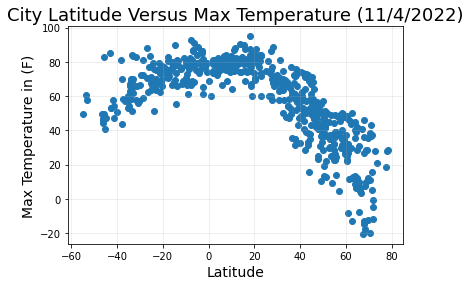

In [9]:
xlat = citydf["Latitude"].values
ylat = citydf["Maximum Temperature"].values

plt.figure(figsize = (6,4))
plt.title("City Latitude Versus Max Temperature (11/4/2022)", fontsize = 18)
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Max Temperature in (F)", fontsize = 14)
plt.scatter(xlat, ylat)
plt.grid(alpha = 0.25)
plt.show()

## Latitude vs. Humidity Plot

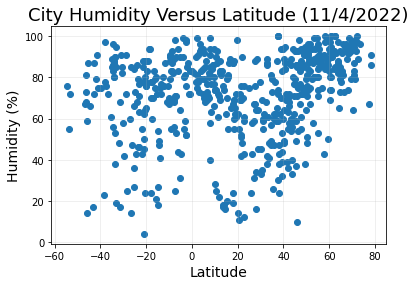

In [10]:
xlat = citydf["Latitude"].values
ylat = citydf["Humidity"].values

plt.figure(figsize = (6,4))
plt.title("City Humidity Versus Latitude (11/4/2022)", fontsize = 18)
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Humidity (%)", fontsize = 14)
plt.scatter(xlat, ylat)
plt.grid(alpha = 0.25)
plt.show()

## Latitude vs. Cloudiness Plot

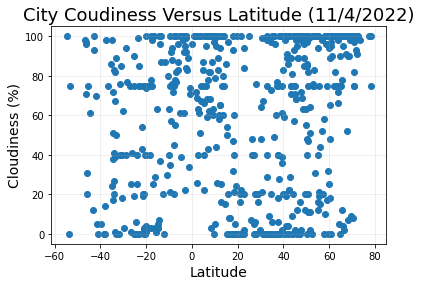

In [11]:
xlat = citydf["Latitude"].values
ylat = citydf["Cloudiness"].values

plt.figure(figsize = (6,4))
plt.title("City Coudiness Versus Latitude (11/4/2022)", fontsize = 18)
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Cloudiness (%)", fontsize = 14)
plt.scatter(xlat, ylat)
plt.grid(alpha = 0.25)
plt.show()

## Latitude vs. Wind Speed Plot

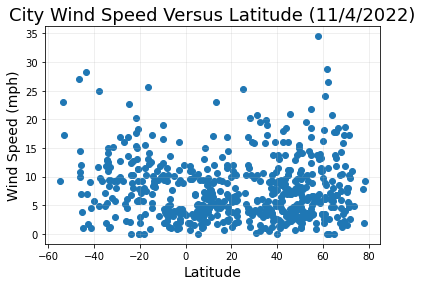

In [12]:
xlat = citydf["Latitude"].values
ylat = citydf["Wind Speed"].values

plt.figure(figsize = (6,4))
plt.title("City Wind Speed Versus Latitude (11/4/2022)", fontsize = 18)
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Wind Speed (mph)", fontsize = 14)
plt.scatter(xlat, ylat)
plt.grid(alpha = 0.25)
plt.show()

## Linear Regression

In [93]:
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

In [92]:
citydfnorth = citydf.loc[citydf["Latitude"] > 0].reset_index()
citydfsouth = citydf.loc[citydf["Latitude"] < 0].reset_index()
citydfnorth

,index,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,3,San Cristobal,7.7757,-72.2214,80.47,58,100,5.08,VE,1667584343
1,11,Puerto Carreño,6.1880,-67.4895,80.58,69,75,4.61,CO,1667584645
2,12,Nome,64.5011,-165.4064,10.47,79,0,8.05,US,1667584371
3,14,Ribeira Grande Municipality,37.8225,-25.5195,72.12,100,40,9.22,PT,1667584657
4,15,Belmonte,39.5593,-2.7038,53.55,32,75,7.65,ES,1667584660
...,...,...,...,...,...,...,...,...,...,...
394,556,Olafsvik,64.8959,-23.7084,42.08,73,100,17.83,IS,1667586825
395,557,Nova Borova,50.6933,28.6396,41.25,87,11,6.53,UA,1667586829
396,558,Alpiarça Municipality,39.2388,-8.5614,59.34,83,39,5.59,PT,1667586833
397,559,Talnakh,69.4940,88.3908,11.86,93,100,11.88,RU,1667586837


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7237451527502545


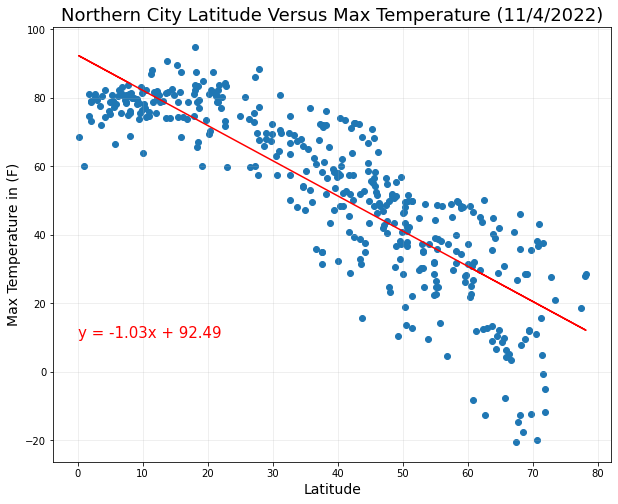

In [97]:
xlatnorth = citydfnorth["Latitude"].values
ylatnorth = citydfnorth["Maximum Temperature"].values

plt.figure(figsize = (10,8))

(slope, intercept, rvalue, pvalue, stderr) = linregress(xlatnorth, ylatnorth)
regress_values = xlatnorth * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xlatnorth,ylatnorth)
plt.plot(xlatnorth,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.title("Northern City Latitude Versus Max Temperature (11/4/2022)", fontsize = 18)
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Max Temperature in (F)", fontsize = 14)
plt.grid(alpha = 0.25)
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4202096344105852


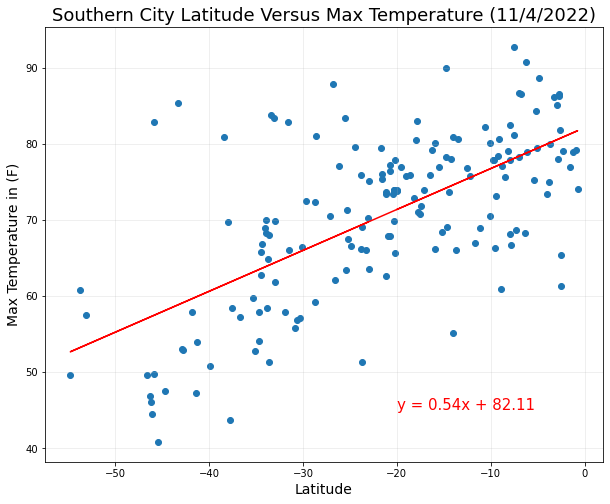

In [99]:
xlatsouth = citydfsouth["Latitude"].values
ylatsouth = citydfsouth["Maximum Temperature"].values

plt.figure(figsize = (10,8))

(slope, intercept, rvalue, pvalue, stderr) = linregress(xlatsouth, ylatsouth)
regress_values = xlatsouth * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xlatsouth,ylatsouth)
plt.plot(xlatsouth,regress_values,"r-")
plt.annotate(line_eq,(-20,45),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.title("Southern City Latitude Versus Max Temperature (11/4/2022)", fontsize = 18)
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Max Temperature in (F)", fontsize = 14)
plt.grid(alpha = 0.25)
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09094717456528675


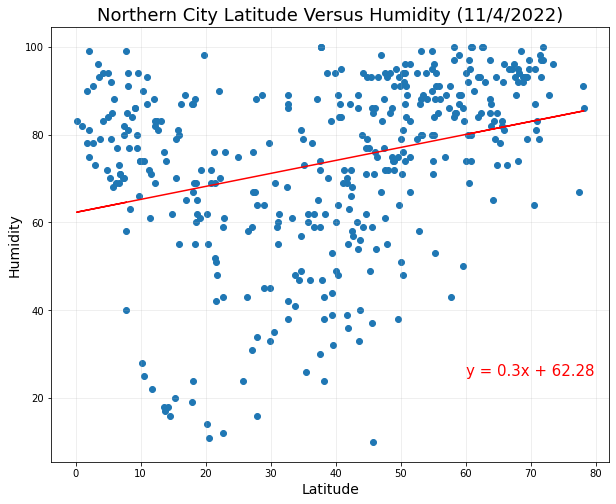

In [107]:
xhumiditynorth = citydfnorth["Latitude"].values
yhumiditynorth = citydfnorth["Humidity"].values

plt.figure(figsize = (10,8))

(slope, intercept, rvalue, pvalue, stderr) = linregress(xhumiditynorth, yhumiditynorth)
regress_values = xhumiditynorth * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xhumiditynorth,yhumiditynorth)
plt.plot(xhumiditynorth,regress_values,"r-")
plt.annotate(line_eq,(60,25),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.title("Northern City Latitude Versus Humidity (11/4/2022)", fontsize = 18)
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Humidity", fontsize = 14)
plt.grid(alpha = 0.25)
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006632557452376547


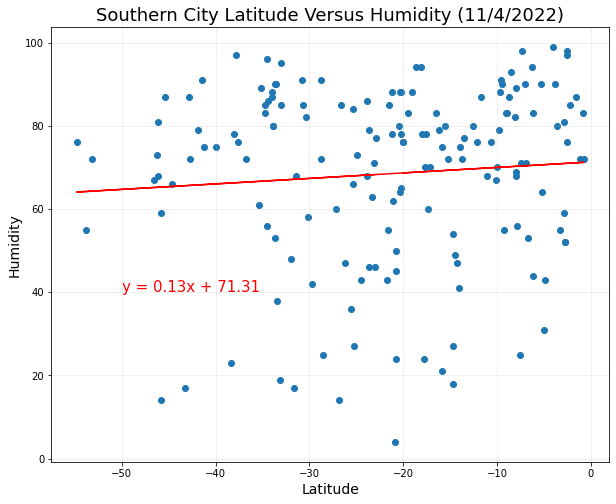

In [106]:
xhumiditysouth = citydfsouth["Latitude"].values
yhumiditysouth = citydfsouth["Humidity"].values

plt.figure(figsize = (10,8))

(slope, intercept, rvalue, pvalue, stderr) = linregress(xhumiditysouth, yhumiditysouth)
regress_values = xhumiditysouth * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xhumiditysouth,yhumiditysouth)
plt.plot(xhumiditysouth,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.title("Southern City Latitude Versus Humidity (11/4/2022)", fontsize = 18)
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Humidity", fontsize = 14)
plt.grid(alpha = 0.25)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.022274828574984282


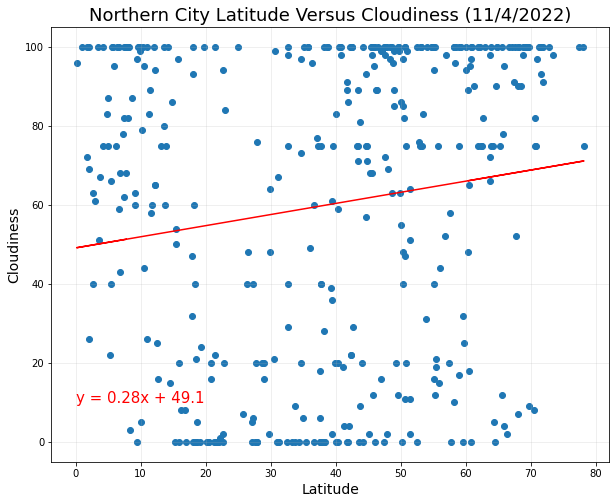

In [103]:
xcloudinessnorth = citydfnorth["Latitude"].values
ycloudinessnorth = citydfnorth["Cloudiness"].values

plt.figure(figsize = (10,8))

(slope, intercept, rvalue, pvalue, stderr) = linregress(xcloudinessnorth, ycloudinessnorth)
regress_values = xcloudinessnorth * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xcloudinessnorth,ycloudinessnorth)
plt.plot(xcloudinessnorth,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.title("Northern City Latitude Versus Cloudiness (11/4/2022)", fontsize = 18)
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Cloudiness", fontsize = 14)
plt.grid(alpha = 0.25)
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04609252329032808


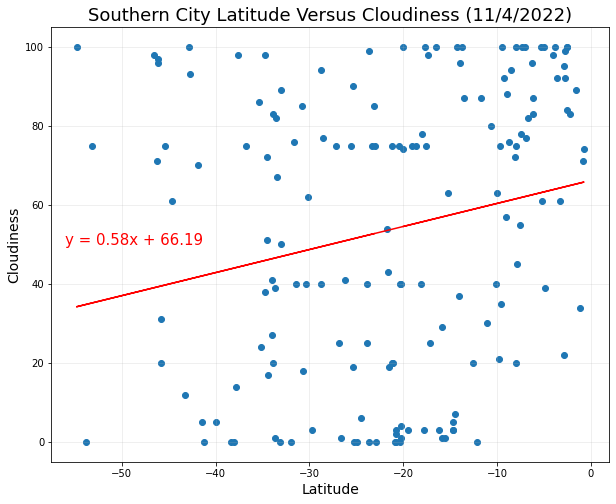

In [109]:
xcloudinesssouth = citydfsouth["Latitude"].values
ycloudinesssouth = citydfsouth["Cloudiness"].values

plt.figure(figsize = (10,8))

(slope, intercept, rvalue, pvalue, stderr) = linregress(xcloudinesssouth, ycloudinesssouth)
regress_values = xcloudinesssouth * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xcloudinesssouth,ycloudinesssouth)
plt.plot(xcloudinesssouth,regress_values,"r-")
plt.annotate(line_eq,(-56,50),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.title("Southern City Latitude Versus Cloudiness (11/4/2022)", fontsize = 18)
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Cloudiness", fontsize = 14)
plt.grid(alpha = 0.25)
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02253898749599841


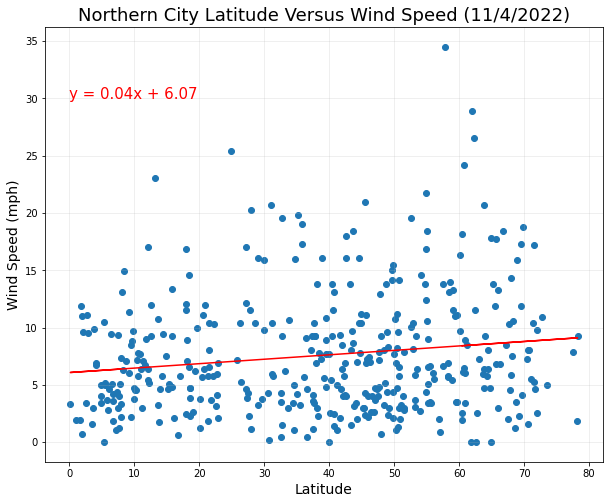

In [110]:
xwindnorth = citydfnorth["Latitude"].values
ywindnorth = citydfnorth["Wind Speed"].values

plt.figure(figsize = (10,8))

(slope, intercept, rvalue, pvalue, stderr) = linregress(xwindnorth, ywindnorth)
regress_values = xwindnorth * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xwindnorth,ywindnorth)
plt.plot(xwindnorth,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.title("Northern City Latitude Versus Wind Speed (11/4/2022)", fontsize = 18)
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Wind Speed (mph)", fontsize = 14)
plt.grid(alpha = 0.25)
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06667579591865701


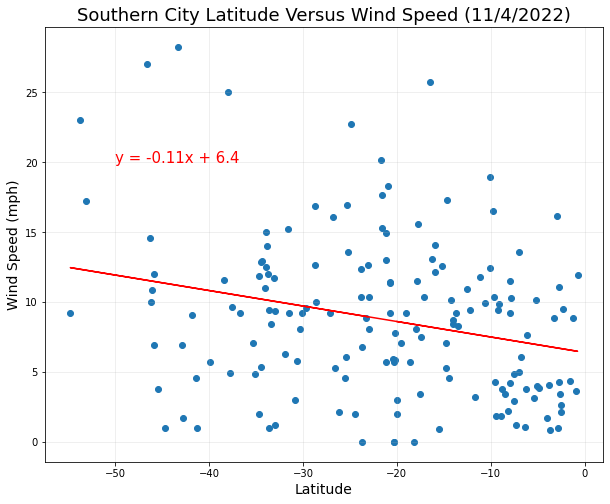

In [112]:
xwindsouth = citydfsouth["Latitude"].values
ywindsouth = citydfsouth["Wind Speed"].values

plt.figure(figsize = (10,8))

(slope, intercept, rvalue, pvalue, stderr) = linregress(xwindsouth, ywindsouth)
regress_values = xwindsouth * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xwindsouth,ywindsouth)
plt.plot(xwindsouth,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.title("Southern City Latitude Versus Wind Speed (11/4/2022)", fontsize = 18)
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Wind Speed (mph)", fontsize = 14)
plt.grid(alpha = 0.25)
plt.show()